<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [56]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [57]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
# Deleted rows that were missing the required data
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.dropna(subset=['TOTAL_EXPENDITURE'], inplace=True)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [58]:
df['instructional_spending_per_student'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_8']
df['total_spending_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_8']
df['ratio_total_to_instruction_spending_per_student'] = df['total_spending_per_student'] / df['instructional_spending_per_student']


Final feature list: **<Ratio of total spending to instructional spending per student\>**

Feature selection justification: **<By monitoring and comparing the above data, I'm aiming to see how instructional spending per student effects math scores, and if the ratio of total to instructional spending per student has a trend with scores, i.e. how much does does the school environment outside of instruction effect student's learning?\>**

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, 'Average 8th Grade Math Score')

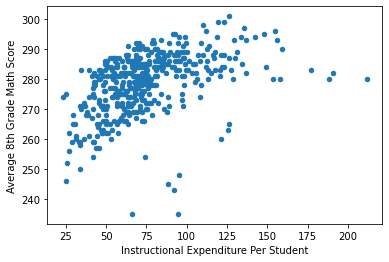

In [59]:
df.plot.scatter(x='instructional_spending_per_student',y='AVG_MATH_8_SCORE')
plt.xlabel('Instructional Expenditure Per Student')
plt.ylabel('Average 8th Grade Math Score')

The graph above aims to help visualize any trends that may exist between instructional spending per student and the average 8th grade math score at a given school. The clearest trend is that the schools with the lowest scores also have the lowest instructional spending per student. The data is roughly linear, with more spending per student generally leading to higher scores.

Visualization 2

Text(0, 0.5, 'Average 8th Grade Math Score')

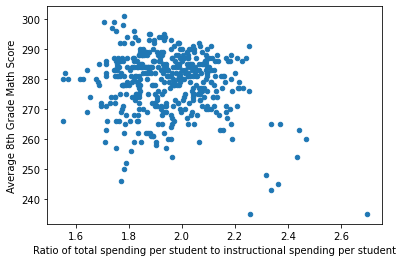

In [60]:
df.plot.scatter(x='ratio_total_to_instruction_spending_per_student',y='AVG_MATH_8_SCORE')
plt.xlabel('Ratio of total spending per student to instructional spending per student')
plt.ylabel('Average 8th Grade Math Score')

This plot also follows a somewhat linear trend. As the ratio of total spending to instructional spending per student increases, the avergage 8th grade math test score decreases. This suggests that some schools may be required to spend more money on keeping their facilites running than instructing students, such as in a large school with limited funding. They may need to keep the building open and operational, and actually instructing the students may come second. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df[['TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','instructional_spending_per_student','ratio_total_to_instruction_spending_per_student']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION\>**

In [64]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [65]:
# create your model here
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test)

0.3144810162932651

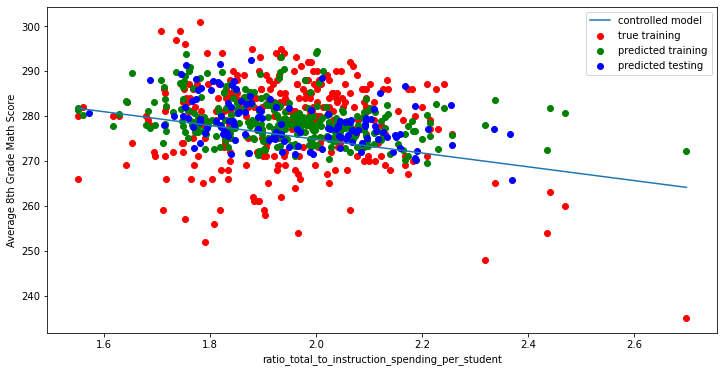

In [77]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'ratio_total_to_instruction_spending_per_student'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 8th Grade Math Score')
# R^2 value
model.score(X_test, y_test)
# Mean error
np.mean(model.predict(X_test)-y_test)
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

<h2> Summary </h2>

I set out to display any trends that may exist between the ratio of total spending to instructional spending per student and the average math scores of 8th graders. To do this, I found the total expenditures per student and the instructional expenditures per student, and found the ratio between the two. I then plotted these values against the average math score of 8th graders. I then created a linear regression model meant to predict the math scores based off of the ratio of spending. The mean error for this model was .682, and the absolute error was 7.055. The r^2 value was .3144. When looking at the plot above, the model may appear to be a good fit. However, the r^2 value and absolute error are too large for this to be considered a good fit for the data. There is too much variation in the data for it to be modeled effectively in this method. More data standardization, or refining what data is being examined may paint a more effective picture. 